In [2]:
from os.path import abspath, join
from glob import glob
import sys
current = abspath("")
root_dir = abspath(join(current, '..', '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [3]:
from utils import (style, get_params, mcmc, plot_chain, plot_corner, plot_fit, calculate_prob, get_data, Model)

style()

In [4]:
z_dir_path = join(root_data_dir, 'Effective-Volume-no')
w_dir_path = join(root_data_dir, 'Velocity-Distribution-no')
z_dir_path, w_dir_path

('/home2/s20321005/Thesis-Project/Data/Effective-Volume-no',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no')

In [6]:
index = 0
z_files = glob(join(z_dir_path, "z*"))
z_files.sort()
w_files = glob(join(w_dir_path, "w*"))
w_files.sort()
name = z_files[index].split("/")[-1].replace(".hdf5", "").replace("z_", "")

result = mcmc(
    model=Model.DDDM,
    z_path=z_files[index],
    w_path=w_files[index],
    step0=100,
    step=1000,
    burn=1000,
    it=3,
    thin=20,
    m=10
)

result.keys()

running...
mcmc... (-0.10)_(0.11)


mcmc:   0%|          | 0/3 [00:00<?, ?it/s]

0: first half mcmc done 2.43 s


mcmc:  33%|███▎      | 1/3 [00:04<00:09,  4.82s/it]

0: second half mcmc done 2.37 s
1: first half mcmc done 2.32 s


mcmc:  67%|██████▋   | 2/3 [00:09<00:04,  4.78s/it]

1: second half mcmc done 2.41 s
2: first half mcmc done 2.35 s


mcmc: 100%|██████████| 3/3 [00:14<00:00,  4.77s/it]

2: second half mcmc done 2.36 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [7]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels, chain.shape

([range(0, 12), 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 array(['rhob', 'rhoDM', 'sigmaDD', 'hDD', 'log_nu0', 'R', 'zsun', 'w0',
        'log_sigmaw', 'q_sigmaw', 'log_a', 'q_a', 'log_phi_b'],
       dtype='<U32'),
 array(['$\\rho_{b}$', '$\\rho_{\\textup{DM}}$',
        '$\\sigma_{\\textup{DD}}$', '$h_{\\textup{DD}}$', '$\\log \\nu_0$',
        '$R$', '$z_{\\odot}$', '$w_0$', '$\\log \\sigma_{w}$', '$q_{w}$',
        '$\\log a$', '$q_a$', '$\\log \\Phi_b$'], dtype='<U32'),
 (50, 360, 36))

 23%|██▎       | 3/13 [00:00<00:01,  9.14it/s]

100%|██████████| 13/13 [00:01<00:00,  7.40it/s]


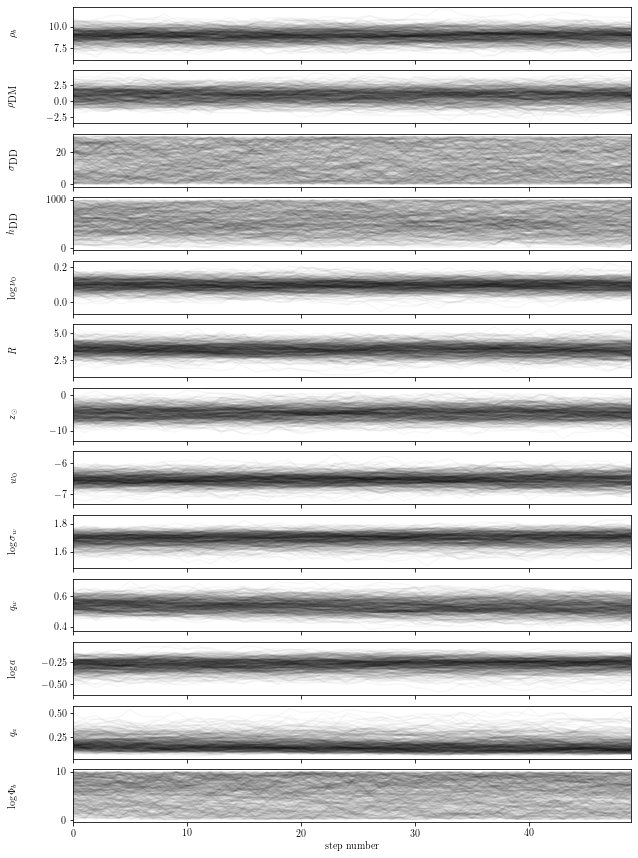

In [8]:
params = get_params(chain, indexes, labs)

plot_chain(
    params=params,
    labels=labels,
    alpha=0.03
)

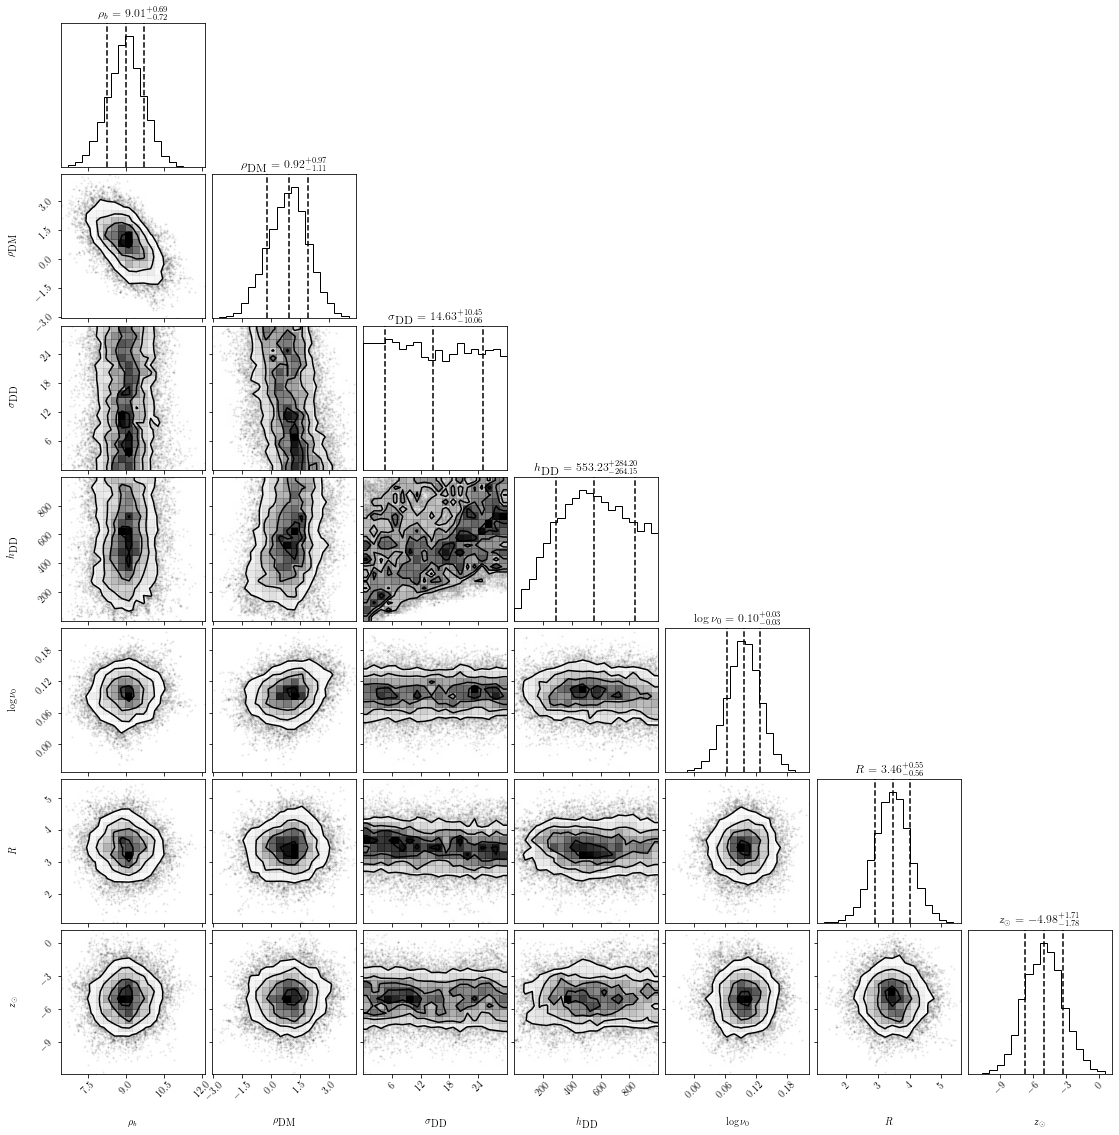

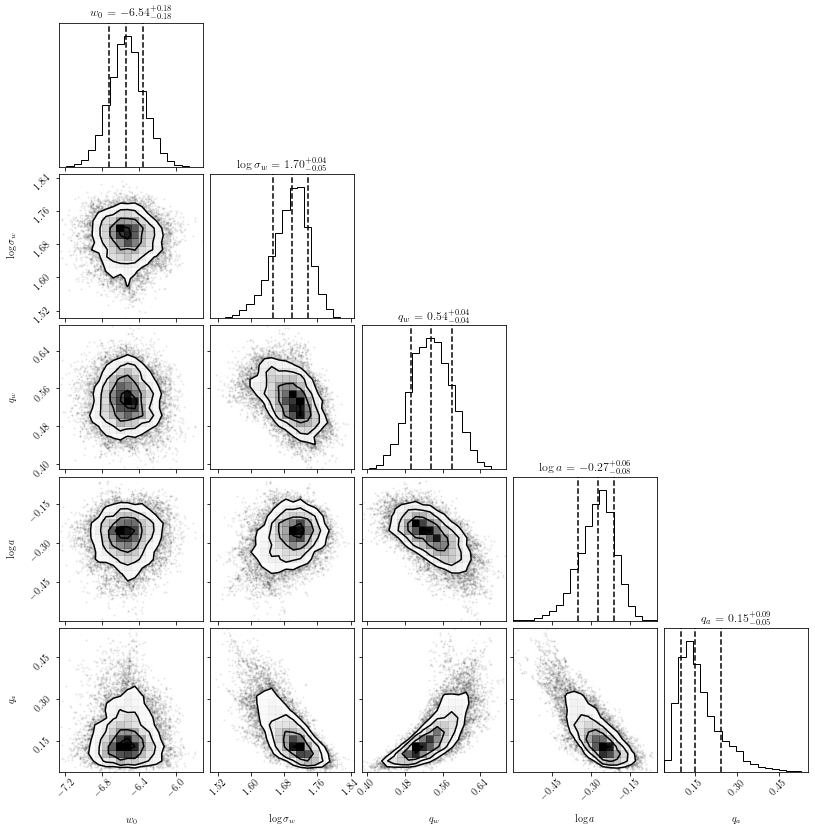

In [9]:
params = get_params(chain, indexes, labs)
bs =  {
    'DM': 5,
    'DDDM': 7,
    'NO': 4
}

b = bs[Model.DDDM.value]

# z
plot_corner(
    params=params[:,:,:b],
    labels=labels[:b],
)
# w
plot_corner(
    params=params[:,:,b:-1],
    labels=labels[b:-1],
)

100%|██████████| 50000/50000 [00:26<00:00, 1872.37it/s]


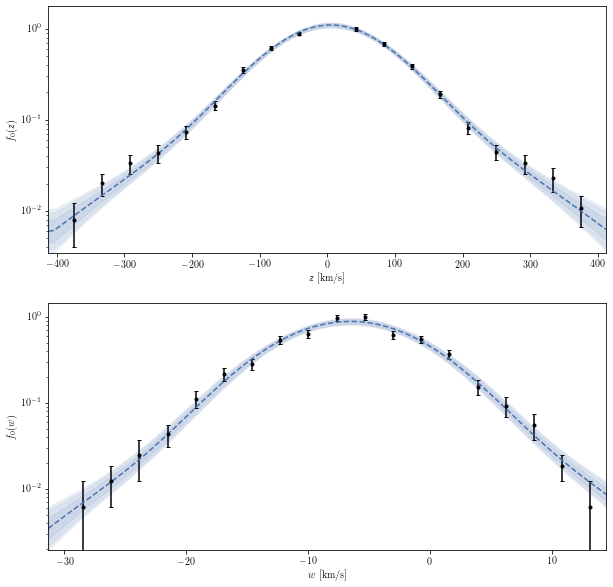

In [11]:
ndim = chain.shape[2]
flat_chain = chain.reshape((-1, ndim))

plot_fit(
    model=Model.DDDM,
    flat_chain=flat_chain,
    z_path=z_files[index],
    w_path=w_files[index],
    log=True,
    nsample=50_000,
    res=100
)

In [13]:
ndim = chain.shape[2]
flat_chain = chain.reshape((-1, ndim))
zdata = get_data(z_files[index])
wdata = get_data(w_files[index])

calculate_prob(
    model=Model.DDDM, 
    zdata=zdata,
    wdata=wdata,
    flat_chain=flat_chain,
    name=name,
    path="tes.txt",
    nsample=50_000,
)

Opening the data
Opening the chain
Calculating likelihood
max log-likelihood: 101.03075873736162
BIC: -32.51843022747923
AIC: -130.06151747472325


# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.